<a href="https://colab.research.google.com/github/mteoraso/Energia_electrica_COL_XM/blob/EDA/Demanda_no_atendida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pydataxm

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [3]:
# Importación
from pydataxm.pydatasimem import ReadSIMEM, CatalogSIMEM

# Crear una instancia de ReadSIMEM
dataset_id = '3C77AF'
fecha_inicio = '2020-01-01'
fecha_fin = '2024-04-30'
generacion = ReadSIMEM(dataset_id, fecha_inicio, fecha_fin)

# Recuperar datos
data = generacion.main(filter=False)
print(data)

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Eventos de Demanda No Atendida"
Start of asynchronous data extraction
End of data extracting process
****************************************************************************************************
     IdentificadorSuceso      FechaHoraInicio         FechaHoraFin  \
0             S000017905  2020-01-31 13:04:00  2020-01-31 19:59:00   
1             S000017904  2020-01-29 09:43:00  2020-01-29 09:53:00   
2             S000017903  2020-01-27 14:24:00  2020-01-27 16:31:00   
3             S000017902  2020-01-26 05:16:00  2020-01-26 06:34:00   
4             S000017901  2020-01-26 07:24:00  2020-01-26 13:15:00   
...                  ...                  ...                  ...   
3585          S000022218  2024-04-01 00:00:00  2024-04-01 00:38:00   
3586          S000022220  2024-04-01 15:41:00  2024-04-01 15:44:00

In [4]:
data

,IdentificadorSuceso,FechaHoraInicio,FechaHoraFin,OrigenEvento,EnergiaNoAtendida,DescripcionEvento,CodigoSubAreaOperativa
0,S000017905,2020-01-31 13:04:00,2020-01-31 19:59:00,No programada,151140.0,Demanda no atendida por disparo del activo SAN...,Are0025
1,S000017904,2020-01-29 09:43:00,2020-01-29 09:53:00,No programada,4630.0,Demanda no atendida por trabajos en la consign...,Are0029
2,S000017903,2020-01-27 14:24:00,2020-01-27 16:31:00,No programada,14610.0,Demanda no atendida por sobrecarga del activo ...,Are0018
3,S000017902,2020-01-26 05:16:00,2020-01-26 06:34:00,Programada,26650.0,Demanda no atendida por trabajos en la consign...,Are0016
4,S000017901,2020-01-26 07:24:00,2020-01-26 13:15:00,Programada,45100.0,Demanda no atendida por trabajos en la consign...,Are0025
...,...,...,...,...,...,...,...
3585,S000022218,2024-04-01 00:00:00,2024-04-01 00:38:00,No programada,1080.0,Continua demanda no atendida por disparo del a...,Are0019
3586,S000022220,2024-04-01 15:41:00,2024-04-01 15:44:00,No programada,1100.0,Demanda no atendida por disparo del activo BL1...,Are0015
3587,S000022217,2024-03-31 23:08:00,2024-03-31 23:59:00,No programada,1440.0,Demanda no atendida por disparo del activo BL1...,Are0019
3588,S000022327,2024-04-30 15:17:00,2024-04-30 15:30:00,No programada,2030.0,Demanda no atendida por disparo del activo LA ...,Are0015


In [5]:
data.isnull().sum()

,0
IdentificadorSuceso,0
FechaHoraInicio,0
FechaHoraFin,0
OrigenEvento,0
EnergiaNoAtendida,0
DescripcionEvento,0
CodigoSubAreaOperativa,0


In [6]:
data = data.astype({"FechaHoraInicio": "datetime64[ns]"})
data = data.astype({"FechaHoraFin": "datetime64[ns]"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   IdentificadorSuceso     3590 non-null   object        
 1   FechaHoraInicio         3590 non-null   datetime64[ns]
 2   FechaHoraFin            3590 non-null   datetime64[ns]
 3   OrigenEvento            3590 non-null   object        
 4   EnergiaNoAtendida       3590 non-null   float64       
 5   DescripcionEvento       3590 non-null   object        
 6   CodigoSubAreaOperativa  3590 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 196.5+ KB


In [41]:
descripciones_eventos = pd.unique(data['DescripcionEvento'])
descripciones_eventos

array(['Demanda no atendida por disparo del activo SAN JUAN 2 50 MVA 110/34.5/13.8 KV transformador de carga de la S/E radial San Juan 110 kV.',
       'Demanda no atendida por trabajos en la consignación C0176405 del activo BL1 BELEN(CUCUTA) A LA INSULA 115 kV. Se materializa Riesgo de Disparo sobre la BL1 BELEN(CUCUTA) A SEVILLA 115 kV.',
       'Demanda no atendida por sobrecarga del activo CARTAGENA - ZARAGOCILLA 1 66 KV al quedar radial la subestación ZARAGOCILLA 66 kV por disparo del activo TERNERA - ZARAGOCILLA 1 66 kV.',
       ...,
       'Demanda no atendida por disparo del activo BL1 SAN JERONIMO A OCCIDENTE 110 KV. Agente reporta recierre exitoso en activo BL1 OCCIDENTE A SAN JERONIMO 110 KV',
       'Demanda no atendida por disparo del activo BL1 GUAPI A OLAYA HERRERA 115 KV dejando sin tension la subestación radial OLAYA HERRERA 115 KV.',
       'Demanda no atendida por disparo del activo ESMERALDA - VITERBO 1 115 kV dejando sin tensión la subestación radial VITERBO 115 k

In [42]:
len(descripciones_eventos)

2802

In [43]:
data['EnergiaNoAtendida'].sum()

230814000.0

In [44]:
data.groupby(['OrigenEvento']).size()

,0
OrigenEvento,
No programada,2626
Programada,964


In [45]:
data.groupby('OrigenEvento')['EnergiaNoAtendida'].sum().round(20).sort_values(ascending=False)

,EnergiaNoAtendida
OrigenEvento,
Programada,1.424111e+08
No programada,8.840288e+07


In [46]:
data.groupby('DescripcionEvento')['EnergiaNoAtendida'].sum().sort_values(ascending=False)

,EnergiaNoAtendida
DescripcionEvento,
Se presenta DNA por evento en las subáreas Atlántico Bolívar y GCM pertenecientes al área Caribe. Debido a falla en el CT de la fase A del activo BL2 SABANALARGA A FUNDACION 220 kV adicionalmente se disparan los extremos remotos asociados a los circuitos de la subestación SABANALARGA 220 kV.,6625350.00
Continua demanda no atendida por trabajos en la consignación de emergencia C0196936 del activo SAMORE - TOLEDO 1 230 kV dejando sin tensión las subestaciones radiales SAMORE 230 kV BANADIA 230 kV y CAÑO LIMON 230 kV.,3802000.00
Continua demanda no atendida por trabajos en la consignación de emergencia C0196936 del activo SAMORE - TOLEDO 1 230 kV dejando sin tensión las subestaciones radiales SAMORE 230 kV BANADIA 230 kV y CAÑO LIMON 230 kV.,2664050.00
Continua demanda no atendida por evento en la S/E VALLEDUPAR 220 KV -110 KV-34.5 KV- 13.8 KV.,1887370.02
"Continúa demanda no atendida por disparo de los activos asociados a la barra CHINÚ 110 KV y el transformador CHINÚ 1 150 MVA 500/110/34.5 kV; dejando sin tensión las subestaciones: CHINÚ PLANTA 110 kV, SAN MARCOS (SUCRE) 110 kV, LA MOJANA 110 kV, CHINÚ PLANTA 110 kV, SINCÉ 110 kV, MAGANGUÉ 110 kV, MOMPOX 110 kV, BOSTON 110 kV, COVEÑAS 110 kV, SIERRA FLOR 110 kV, TOLUVIEJO 110 kV, EL CARMEN 110 kV, ZAMBRANO 66 kV, SAN JACINTO 66 kV y CALAMAR 66 kV.",1717050.00
...,...
Demanda no atendida por disparo de los activos asociados a la subestación CONVENCION 115 kV dejando sin tensión las subestaciones temporalmente radiales CONVENCION 115 kV y TIBU 115 kV.,1000.00
"Continúa demanda no atendida por disparo del activo BL1 EL PASO A EL BANCO 110 kV, dejando sin tensión la S/E radial EL BANCO 110 kV.",1000.00
Continua demanda no atendida por criterios de confiabilidad de la subárea Bolivar.,1000.00


In [47]:
data.groupby('CodigoSubAreaOperativa')['EnergiaNoAtendida'].sum().sort_values(ascending=False)

,EnergiaNoAtendida
CodigoSubAreaOperativa,
Are0025,61339430.00
Are0018,46415029.97
Are0016,34914180.02
Are0021,25062750.02
Are0019,12860440.00
Are0129,10426030.00
Are0017,7099660.00
Are0027,7099239.99
Are0026,6678540.00


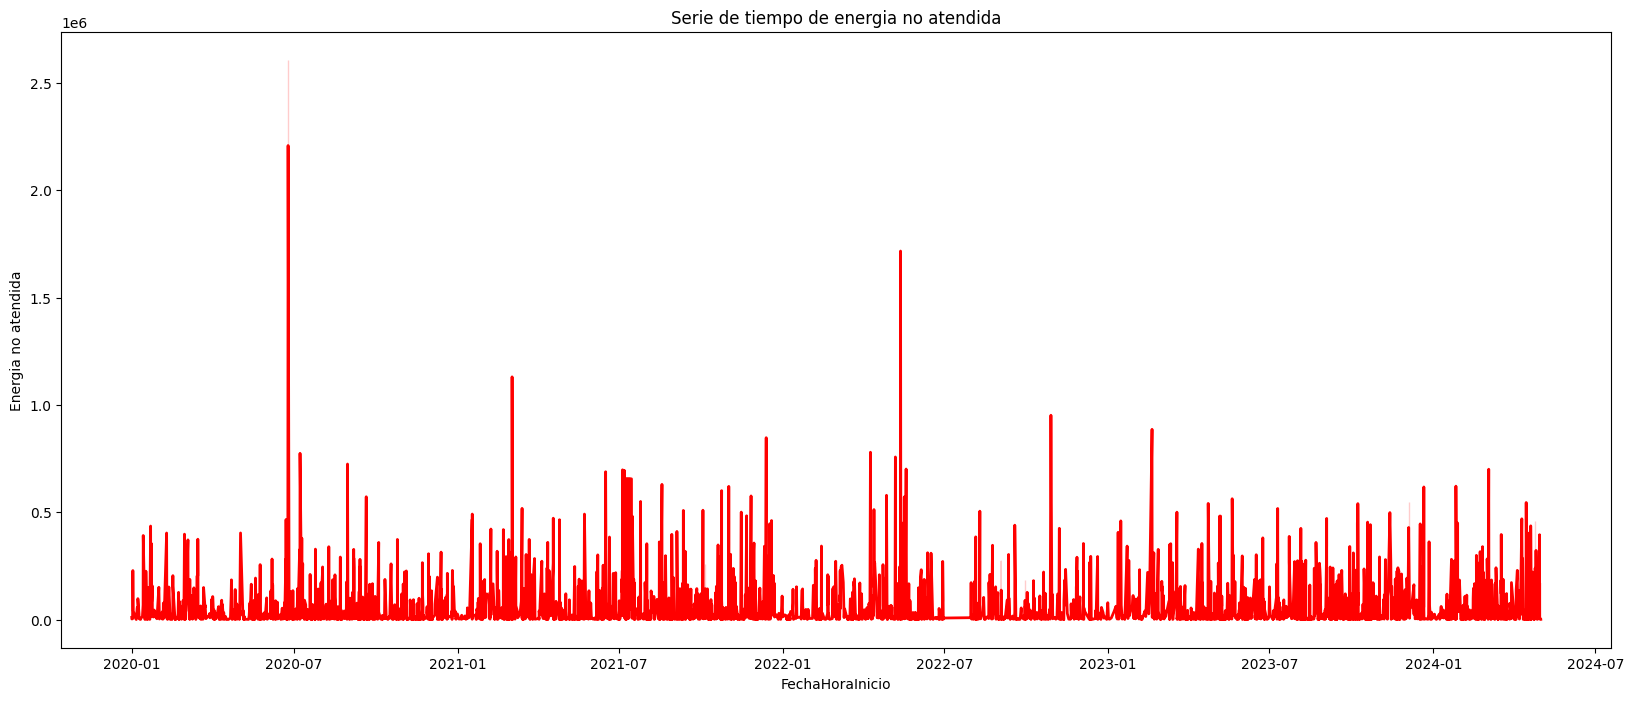

In [48]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data, x=data['FechaHoraInicio'],y=data['EnergiaNoAtendida'],color='red',lw=2,)
plt.ylabel("Energia no atendida")
plt.title("Serie de tiempo de energia no atendida");

<ipython-input-49-b9d962393e74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['OrigenEvento'], y=data['EnergiaNoAtendida'], palette="pastel")


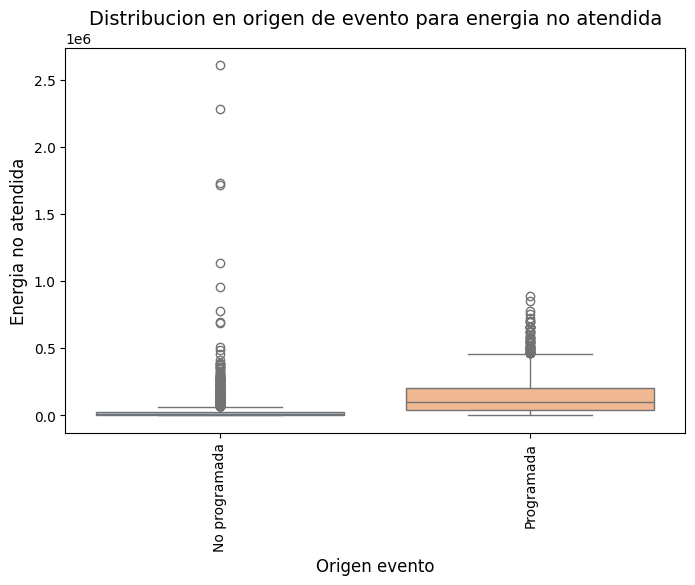

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['OrigenEvento'], y=data['EnergiaNoAtendida'], palette="pastel")
plt.title('Distribucion en origen de evento para energia no atendida', fontsize=14)
plt.xlabel('Origen evento', fontsize=12)
plt.ylabel('Energia no atendida', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

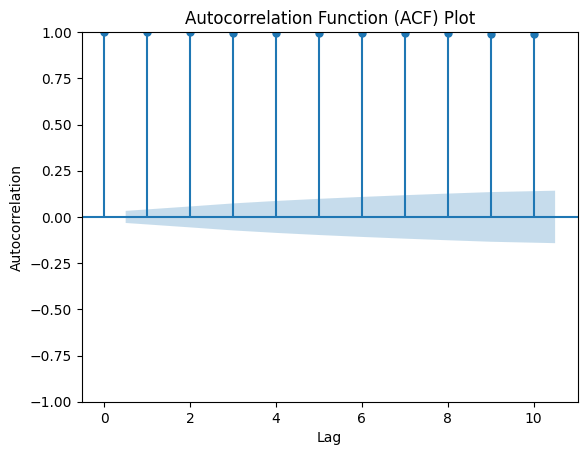

In [50]:
plt.figure(figsize=(12, 6))
plot_acf(data['FechaHoraInicio'], lags=10) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

<Figure size 1200x600 with 0 Axes>

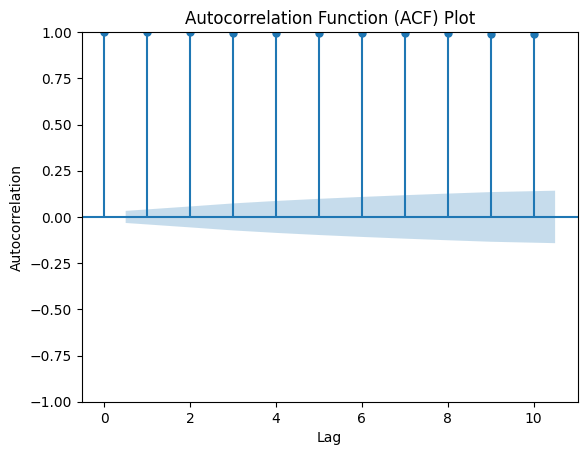

In [51]:
plt.figure(figsize=(12, 6))
plot_acf(data['FechaHoraFin'], lags=10) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [52]:
data_origen_desc = data.groupby(['OrigenEvento', 'DescripcionEvento']).size().sort_values(ascending=False)
data_origen_desc

OrigenEvento   DescripcionEvento                                                                                                                                       
No programada  Demanda no atendida por bajas tensiones en la subestación EL BANCO 110 kV.                                                                                  33
               Demanda no atendida por disparo del activo GRANADA - OCOA 1 115 kV, dejando sin tensión las S/Es radiales GRANADA 115 kV y SAN JOSE DEL GUAVIARE 115 kV.    21
               Demanda no atendida por disparo del activo EL PASO - EL BANCO 1 110 kV dejando sin tensión la S/E radial EL BANCO 110 kV.                                   19
               Demanda no atendida por disparo del activo FUNDACION - TFUNDACION - RIO CORDOBA 1 110 kV.                                                                   17
               Demanda no atendida por disparo del activo EL PASO - EL COPEY 1 110 kV, dejando sin tensión las S/Es radiales EL PASO 110 kV y EL BANCO 110 kV.             13
                                                                                                                                                                           ..
               Demanda no atendida por disparo del activo BL1 TECHO A TERMINAL 115 kV, dejando sin tensión la S/E temporalmente radial TECHO 115 kV.                        1
               Demanda no atendida por disparo del activo BL1 TECHO A TERMINAL 115 kV.                                                                                      1
               Demanda no atendida por disparo del activo BL1 TERMINAL A TECHO 115 KV, dejando sin tensión la S/E radial TECHO 115 kV.                                      1
               Demanda no atendida por disparo del activo BL1 TERMOZIPA A GRAN SABANA 115 kV, dejando sin tensión la subestación radial GRAN SABANA 115 kV.                 1
Programada     por trabajos en consignaciones C0178175 C0178214 de los activos BARRA BOSTON 110 kV BT BOSTON 1 60 MVA 110 kV.                                               1
Length: 2812, dtype: int64

In [55]:
category_counts = data['DescripcionEvento'].value_counts()
category_order = category_counts.index
top_30_categories = category_counts.head(30).index

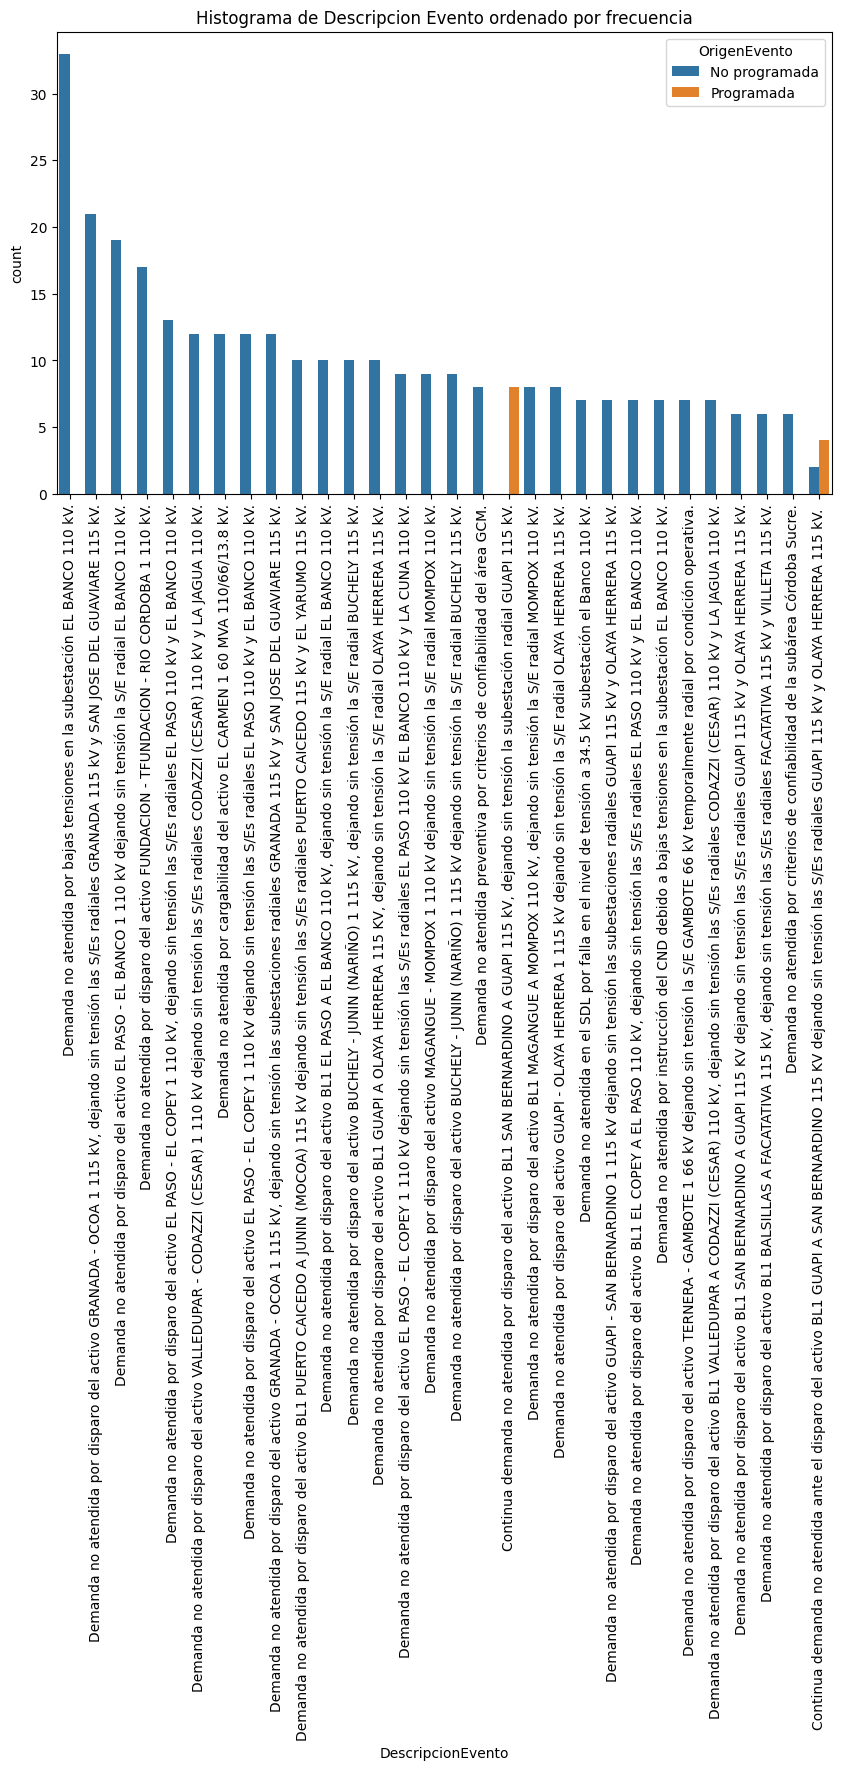

In [60]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.countplot(data=data, x="DescripcionEvento", hue="OrigenEvento", order=top_30_categories)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor legibilidad
plt.title('Histograma de Descripcion Evento ordenado por frecuencia')
plt.show()

In [109]:
data['Duracion'] = (data['FechaHoraFin'] - data['FechaHoraInicio']).dt.total_seconds()

In [110]:
data['Duracion'].sort_values(ascending=False)

,Duracion
2556,142260.0
3479,127680.0
2204,111180.0
2909,106200.0
3397,104820.0
...,...
1202,120.0
3533,60.0
1125,0.0
1446,0.0


In [111]:
data['Duracion'] = (data['FechaHoraFin'] - data['FechaHoraInicio'])
data['DuracionHoras'] = data['Duracion'].dt.total_seconds() / 3600
data['DuracionHoras'].sort_values(ascending=False)

,DuracionHoras
2556,39.516667
3479,35.466667
2204,30.883333
2909,29.500000
3397,29.116667
...,...
1202,0.033333
3533,0.016667
1125,0.000000
1446,0.000000


In [112]:
data['Horas'] = data['Duracion'] // 3600
data['Minutos'] = (data['Duracion'] % 3600) // 60

In [113]:
promedio_horas = data['Horas'].mean()
promedio_minutos = data['Minutos'].mean()

In [118]:
promedio_minutos

Timedelta('0 days 00:00:00.000000019')

In [114]:
std_horas = data['Horas'].std()
std_minutos = data['Minutos'].std()